# Basyian Models Built in Python
## Simple Baysian Model using likelihood
## Finding parameters using MCMC Approach
## Hierachial Model
## Residual Analysis

In [69]:
#### Tutorial Followed from https://juanitorduz.github.io/intro_pymc3/

## Poisson Data

In [1]:
import numpy as np

In [2]:
import scipy.stats as ss

In [3]:
np.random.seed(5)

In [4]:
#number of examples
n = 100

In [5]:
#parameter
lamda = 2

In [6]:
#sample data
y = np.random.poisson(lam=lamda, size=n)

In [7]:
print(y)

[2 4 1 0 2 2 2 2 1 1 3 2 0 1 3 3 4 2 0 0 3 6 1 2 1 2 5 2 3 0 1 3 1 4 1 2 4
 0 6 4 1 2 2 0 1 2 4 4 1 3 0 3 3 2 4 2 2 1 1 2 5 2 3 0 1 1 1 3 4 1 3 4 2 1
 2 4 2 2 1 0 2 2 3 0 3 3 4 2 2 1 2 1 3 0 1 0 3 3 1 2]


In [8]:
#mean of the sample
np.mean(y)

2.06

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#Histogram of the sample

/Users/gururaj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


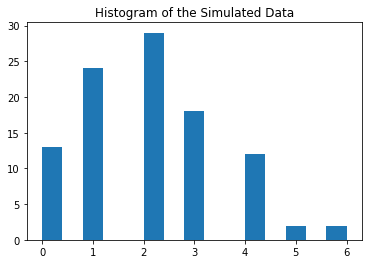

In [11]:
plt.hist(y, bins=15, normed=False)
plt.title('Histogram of the Simulated Data')
plt.show()

## let us consider gamma distribution for the lambda parameter

In [14]:
# density function for gamma distribution is refered

## parameters for the prior distribution

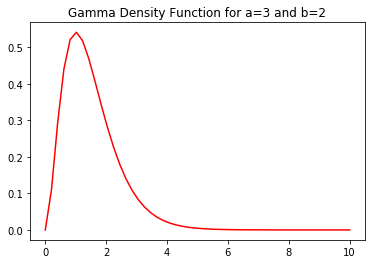

In [15]:
a = 3
b = 2

x = np.linspace(0, 10)
plt.plot(x, ss.gamma.pdf(x,  a=a, scale=1/b), "r-")
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))
plt.show()

In [16]:
# prior distribution - gamma distribution for lambda parameter

prior = lambda x: ss.gamma.pdf(x, a=a, scale=1/b)

### Now we model likelihood because we have data and prior

In [17]:
import scipy.special as sp

In [18]:
# likelihood function

def likelihood(lam, y):
    factorials = np.apply_along_axis(lambda x: sp.gamma(x+1), axis=0, arr=y)
    
    numerator = np.exp(-lam*y.size) * (lam ** y.sum())
    
    denominator = np.multiply.reduce(factorials)
    
    return numerator/denominator

In [19]:
def posterior_upto_constant(lam, y):
    return likelihood(lam, y) * prior(lam)

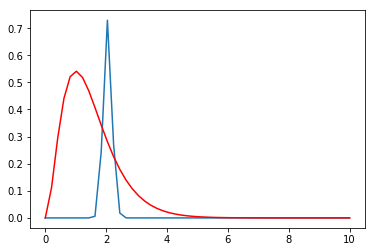

In [20]:
# Plot of the prior and (scaled) posterior distribution
# for the parameter lambda.
#
# We multiply the posterior distrubution function
# by the amplitude factor 2.5e74 to make it comparable
# with the prior gamma distribution.
plt.plot(x, 2.5e74*posterior_upto_constant(x,y))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.show()

## We can see posterior distribution is concentrated around value 2

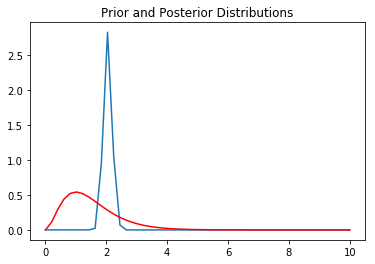

In [21]:
def posterior(lam,y):
    
    shape = a + y.sum()
    rate = b + y.size
    
    return ss.gamma.pdf(lam, shape, scale=1/rate)

plt.plot(x, posterior(x,y))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Prior and Posterior Distributions')
plt.show()

In [22]:
# Posterior gamma parameters.
# these are parameters obtained from simplification of likelihood * prior formula

shape = a + y.sum()
rate = b + y.size

# Posterior mean.
shape/rate

2.049019607843137

### Conclusion - We found that the posterior distribution is concentrated around 2, so the parameter
### that has been used to generate this data might be around 2 - which is true because we have generated data ### with 2

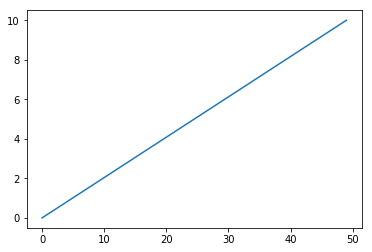

In [23]:
plt.plot(x)

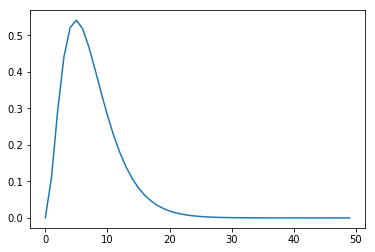

In [24]:
plt.plot(prior(x))

In [25]:
y

array([2, 4, 1, 0, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 3, 3, 4, 2, 0, 0, 3, 6,
       1, 2, 1, 2, 5, 2, 3, 0, 1, 3, 1, 4, 1, 2, 4, 0, 6, 4, 1, 2, 2, 0,
       1, 2, 4, 4, 1, 3, 0, 3, 3, 2, 4, 2, 2, 1, 1, 2, 5, 2, 3, 0, 1, 1,
       1, 3, 4, 1, 3, 4, 2, 1, 2, 4, 2, 2, 1, 0, 2, 2, 3, 0, 3, 3, 4, 2,
       2, 1, 2, 1, 3, 0, 1, 0, 3, 3, 1, 2])

In [26]:
likelihood(x,y)

array([0.00000000e+000, 6.08555309e-201, 8.57682345e-148, 2.21295786e-120,
       1.65653339e-103, 2.08694105e-092, 5.85725558e-085, 4.96112474e-080,
       6.00853413e-077, 2.83815078e-075, 1.03735124e-074, 4.78262444e-075,
       3.98985516e-076, 7.92133404e-078, 4.63116667e-080, 9.43977699e-083,
       7.68645527e-086, 2.79469739e-089, 4.97554140e-093, 4.68590411e-097,
       2.49217202e-101, 7.91445352e-106, 1.57458379e-110, 2.04585596e-115,
       1.80013027e-120, 1.10733043e-125, 4.89770294e-131, 1.59685500e-136,
       3.92402559e-142, 7.41331151e-148, 1.09610072e-153, 1.28892672e-159,
       1.22310049e-165, 9.49042212e-172, 6.09422008e-178, 3.27435428e-184,
       1.48685704e-190, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

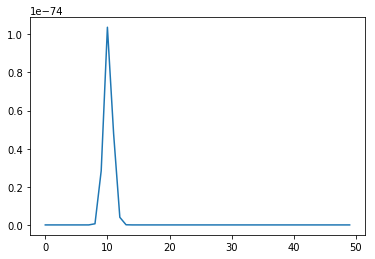

In [27]:
plt.plot(likelihood(x,y))

In [28]:
posterior = likelihood(x,y) * prior(x)

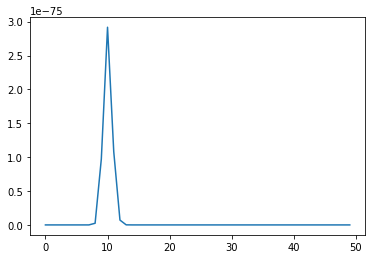

In [29]:
plt.plot(posterior)

In [30]:
shape = a + posterior.sum()
rate = b + posterior.size

In [31]:
posterior_mean = shape/rate
print(posterior_mean)

0.057692307692307696


# Markov Chain Monte Carlo (MCMC) Approach

In [32]:
# In General MCMC Approach is used to model to get parameters from posterior distribution

In [33]:
import pymc3 as pm

In [34]:
model = pm.Model()

In [37]:
%%time
with model:
    
    #prior distribution - gamma distribution assumption
    lam = pm.Gamma("lambda", alpha=a, beta=b)
    
    
    #now the main model - assume data is from poisson distribution
    # ALso this will be the likelihood function
    y_obs = pm.Poisson("y_obs", mu=lam, observed=y)
    
    #MCMC Approch - Need to specify - Number of draws and number of chains
    trace = pm.sample(draws=2000, njobs=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [lambda]
Sampling 3 chains: 100%|██████████| 7500/7500 [00:04<00:00, 1768.22draws/s]
The acceptance probability does not match the target. It is 0.883210118699143, but should be close to 0.8. Try to increase the number of tuning steps.


CPU times: user 4.44 s, sys: 1.25 s, total: 5.69 s
Wall time: 1min


## Model is generated 3 independent Markov Chains to avoid dependence on the intial point

### Plot the trace of model to see the fitted model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26bc5c50>,
      dtype=object)

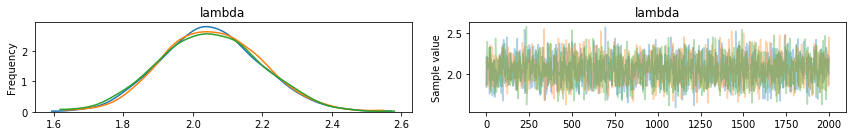

In [40]:
pm.traceplot(trace)

##  Mean and quantile information from the posterior distribution

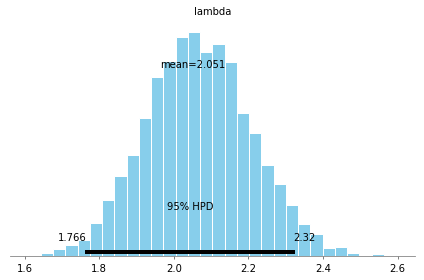

In [43]:
pm.plot_posterior(trace)

### It says mean=2.051 - meaning the parameter lambda that might have generated the data we have fitted is 2.051(Which is true)

In [45]:
import pandas as pd

In [49]:
cookies = pd.read_csv("/Users/gururaj/Documents/Leuphana Study Materials/Data/cookie.dat", sep=" ")

In [50]:
cookies.head()

,chips,location
0,12,1
1,12,1
2,6,1
3,13,1
4,12,1


In [51]:
cookies.location.unique()

array([1, 2, 3, 4, 5])

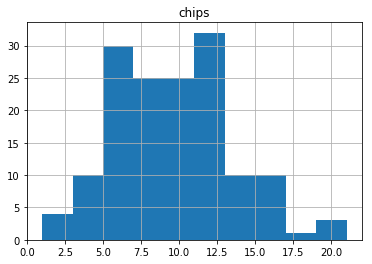

In [52]:
cookies.hist(column="chips", bins=10);

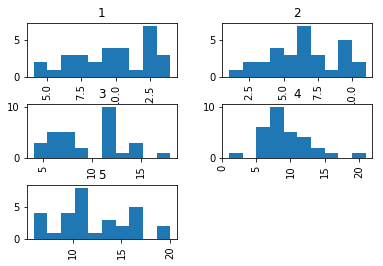

In [53]:
cookies.hist(column="chips", by="location", bins=10);

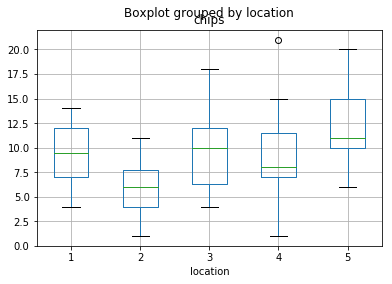

In [54]:
cookies.boxplot(column="chips", by="location")

# Hierachial Model
### Assumptions :
### First Hierachi - No of Chips is Distributed with "Poisson Distribution"
### Parameter Assumptions
### Second Hierachi - Lambda - "Gamma distribution" - has 2 parameters (a and b)
### a = mean^2/sigma^2 and b = mean/sigma^2
### Third Hierachi
### mean is again "gamma distributed" and sigma is "exponential distributed"

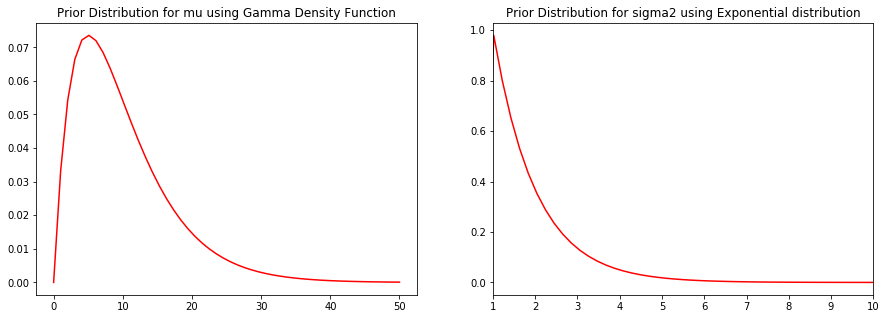

In [56]:
x = np.linspace(0, 50)

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x, ss.gamma.pdf(x, a=2, scale=5), "r-")
plt.title("Prior Distribution for mu using Gamma Density Function")

plt.subplot(1,2,2)
x = np.linspace(0,10)
plt.plot(x, ss.expon.pdf(x,1), "r-")
plt.title("Prior Distribution for sigma2 using Exponential distribution")
plt.xlim(1, 10)
plt.show()

# Complete Hierachial Model using PyMC3 library

In [58]:
model = pm.Model()

with model:
    #Prior Distribution for mu
    mu = pm.Gamma("mu", alpha=2.0, beta = 1.0/5)
    
    #Prior Distribution for sigma2
    sigma = pm.Exponential("sigma", 1.0)
    
    
    #parameters for lambda
    #shape
    alpha = mu**2/(sigma**2)
    
    #scale
    beta = mu/(sigma**2)
    
    #lamda parameter - gamma distribution
    lam = pm.Gamma("lam", alpha=alpha, beta=beta,
                  shape=cookies.location.values.max())
    
    
    #Main Model
    # ALso likelihood function
    
    chips = []
    
    for i in range(cookies.location.values.max()):
        model_temp = pm.Poisson("chips_{}".format(i), lam[i],
                               observed=cookies[cookies.location==i+1].chips.values)
        chips.append(model_temp)
    
    
    #Parameters for Simulation Now
    #Number of iterations and Number of Chains
    
    n_draws, n_chains = 1000, 3
    
    n_sim = n_draws*n_chains
    
    trace = pm.sample(draws=n_draws, n_jobs=n_chains)

INFO (theano.gof.compilelock): Refreshing lock /Users/gururaj/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lam, sigma, mu]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:04<00:00, 740.34draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2834e7b8>,
      dtype=object)

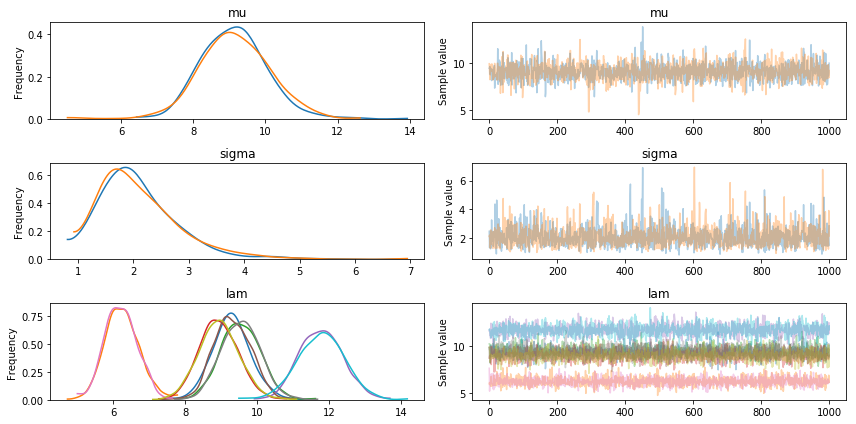

In [59]:
pm.traceplot(trace)

In [60]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,9.125020,0.938740,0.020432,7.531336,11.127539,1908.661870,0.999523
sigma,2.110992,0.738146,0.018190,0.948422,3.523789,1702.302001,1.000169
lam__0,9.285130,0.518265,0.009747,8.346576,10.362821,2906.852649,0.999781
lam__1,6.225588,0.459345,0.008123,5.375397,7.123547,2892.296128,1.001103
lam__2,9.527564,0.537577,0.011805,8.456246,10.518198,2277.650713,0.999554
lam__3,8.923555,0.544218,0.010217,7.838698,9.932003,2247.481347,0.999574
lam__4,11.764045,0.625593,0.012025,10.545083,12.957414,2085.703311,0.999508


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c277787b8>,
      dtype=object)

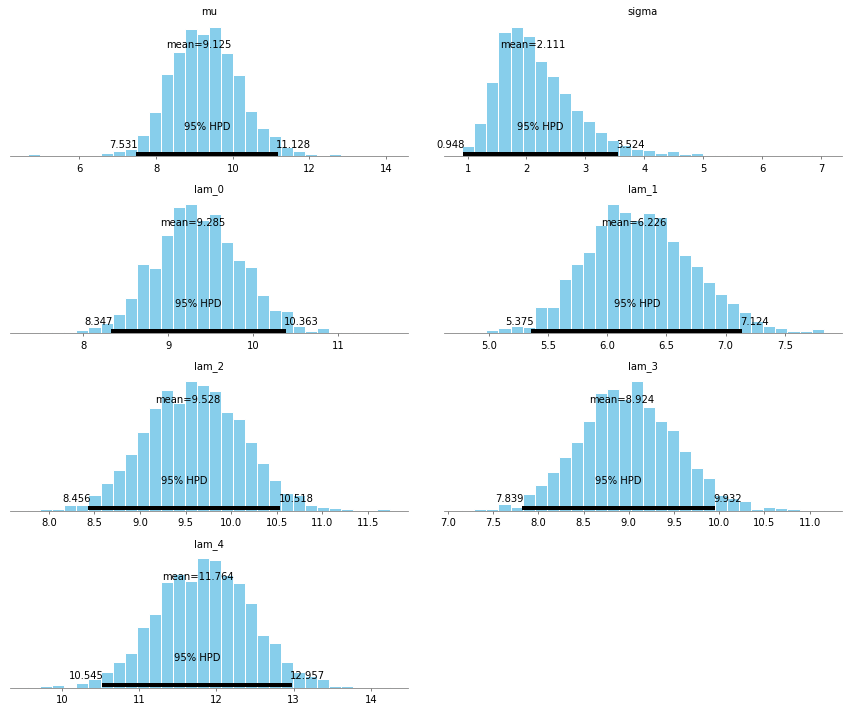

In [61]:
pm.plot_posterior(trace)

### Now we know the mean, sigma and lamda parameters for each location - we can use thie to predict the future values

In [62]:
pm.gelman_rubin(trace)

{'mu': 0.9995225677808414,
 'sigma': 1.0001692711840622,
 'lam': array([0.99978115, 1.00110326, 0.9995541 , 0.99957369, 0.99950755])}

In [63]:
### Auto correlation plots to see the lags

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c28861588>,
      dtype=object)

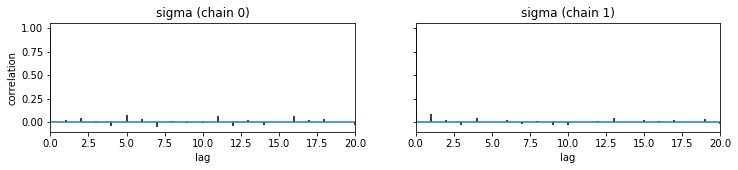

In [65]:
pm.autocorrplot(trace, varnames=["sigma"], max_lag=20)

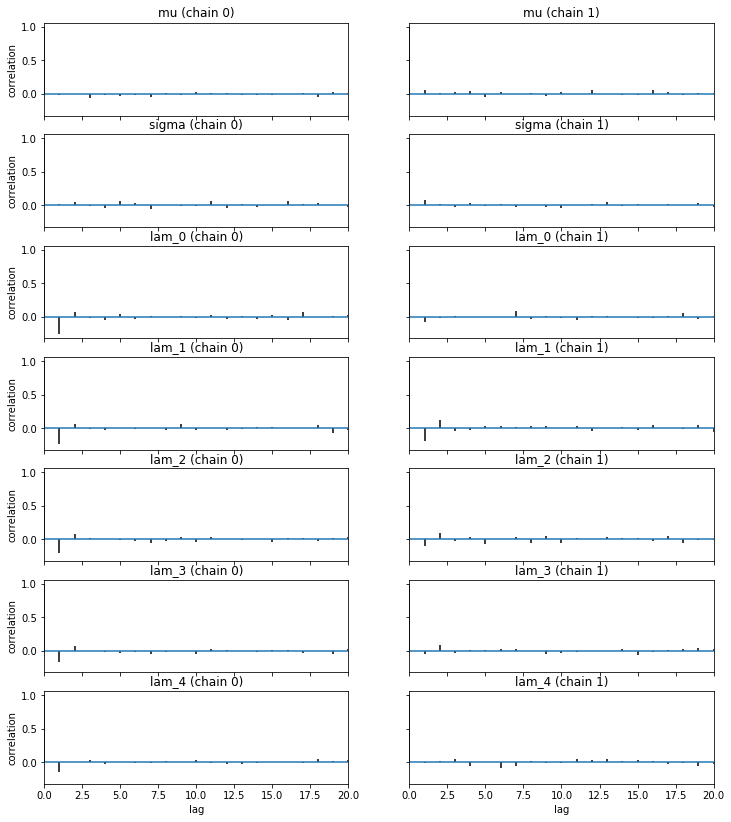

In [66]:
pm.autocorrplot(trace, max_lag=20);

## Residuals Analysis

In [70]:
# Compute the mean of the simulation.
lambda_mean = np.apply_along_axis(np.mean, 0, trace['lam'])

# Compute for each sample the posterior mean.
cookies['yhat'] = cookies.location.apply(lambda x: lambda_mean[x-1])

# Compute the residuals.
cookies['resid'] = cookies.apply(lambda x: x.chips - x.yhat, axis=1)

cookies.head()

,chips,location,yhat,resid
0,12,1,9.28513,2.71487
1,12,1,9.28513,2.71487
2,6,1,9.28513,-3.28513
3,13,1,9.28513,3.71487
4,12,1,9.28513,2.71487


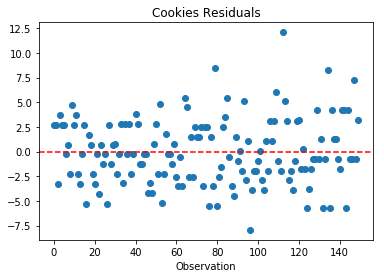

In [71]:
# Cookies Residuals
plt.scatter(x=cookies.index.values, y=cookies.resid.values)
plt.axhline(y=0.0, color='r', linestyle='--')
plt.title('Cookies Residuals')
plt.xlabel('Observation');

### Whenever any model is built - Residuals need to be normally distributed

In [73]:
### Predictions for the new locations

In [76]:
param_a = trace['mu']**2/trace['sigma']**2
param_b = trace['mu']/trace['sigma']**2

param_lambda = np.random.gamma(param_a, 1/param_b, n_sim)

prediction_model = np.random.poisson(lam=lambda_pred_dist, size=n_sim)
